In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
tennis = pd.read_csv("tennis_stats.csv")

In [3]:
tennis.head()

,Player,Year,FirstServe,FirstServePointsWon,FirstServeReturnPointsWon,SecondServePointsWon,SecondServeReturnPointsWon,Aces,BreakPointsConverted,BreakPointsFaced,...,ReturnGamesWon,ReturnPointsWon,ServiceGamesPlayed,ServiceGamesWon,TotalPointsWon,TotalServicePointsWon,Wins,Losses,Winnings,Ranking
0,Pedro Sousa,2016,0.88,0.50,0.38,0.50,0.39,0,0.14,7,...,0.11,0.38,8,0.50,0.43,0.50,1,2,39820,119
1,Roman Safiullin,2017,0.84,0.62,0.26,0.33,0.07,7,0.00,7,...,0.00,0.20,9,0.67,0.41,0.57,0,1,17334,381
2,Pedro Sousa,2017,0.83,0.60,0.28,0.53,0.44,2,0.38,10,...,0.16,0.34,17,0.65,0.45,0.59,4,1,109827,119
3,Rogerio Dutra Silva,2010,0.83,0.64,0.34,0.59,0.33,2,0.33,5,...,0.14,0.34,15,0.80,0.49,0.63,0,0,9761,125
4,Daniel Gimeno-Traver,2017,0.81,0.54,0.00,0.33,0.33,1,0.00,2,...,0.00,0.20,2,0.50,0.35,0.50,0,1,32879,272


In [4]:
tennis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1721 entries, 0 to 1720
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Player                      1721 non-null   object 
 1   Year                        1721 non-null   int64  
 2   FirstServe                  1721 non-null   float64
 3   FirstServePointsWon         1721 non-null   float64
 4   FirstServeReturnPointsWon   1721 non-null   float64
 5   SecondServePointsWon        1721 non-null   float64
 6   SecondServeReturnPointsWon  1721 non-null   float64
 7   Aces                        1721 non-null   int64  
 8   BreakPointsConverted        1721 non-null   float64
 9   BreakPointsFaced            1721 non-null   int64  
 10  BreakPointsOpportunities    1721 non-null   int64  
 11  BreakPointsSaved            1721 non-null   float64
 12  DoubleFaults                1721 non-null   int64  
 13  ReturnGamesPlayed           1721 

# Finding how the features correlate with Winnings

In [5]:
corr_matrix = tennis.corr()
corr_matrix["Winnings"].sort_values(ascending=False)

C:\Users\kuba\AppData\Local\Temp\ipykernel_17572\4127615838.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = tennis.corr()


Winnings                      1.000000
Wins                          0.913297
ServiceGamesPlayed            0.912985
ReturnGamesPlayed             0.912613
BreakPointsOpportunities      0.900444
BreakPointsFaced              0.876036
Losses                        0.869277
DoubleFaults                  0.854685
Aces                          0.798404
TotalPointsWon                0.461061
TotalServicePointsWon         0.407707
ServiceGamesWon               0.395577
FirstServePointsWon           0.361121
SecondServePointsWon          0.281215
ReturnGamesWon                0.279645
ReturnPointsWon               0.271646
BreakPointsSaved              0.258271
FirstServeReturnPointsWon     0.240808
SecondServeReturnPointsWon    0.199401
BreakPointsConverted          0.075022
FirstServe                    0.057882
Year                          0.043908
Ranking                      -0.359835
Name: Winnings, dtype: float64

# Plotting some of the highest correlated features

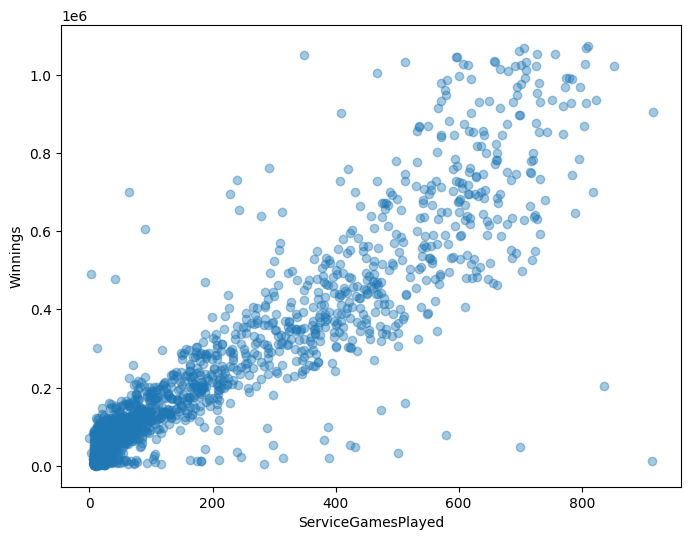

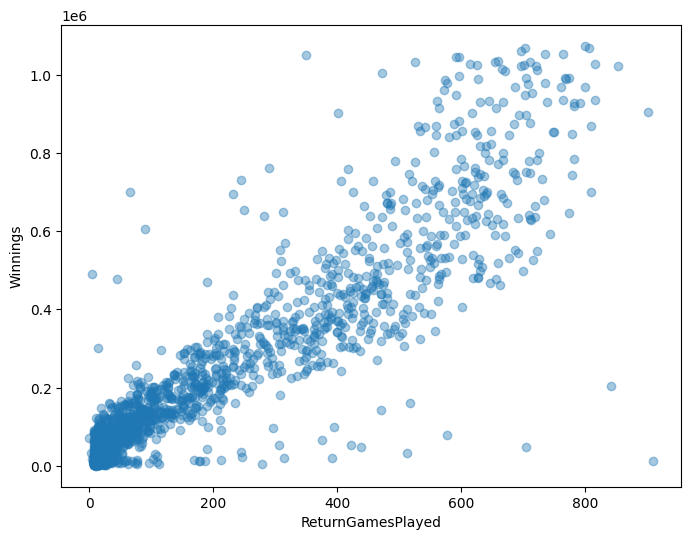

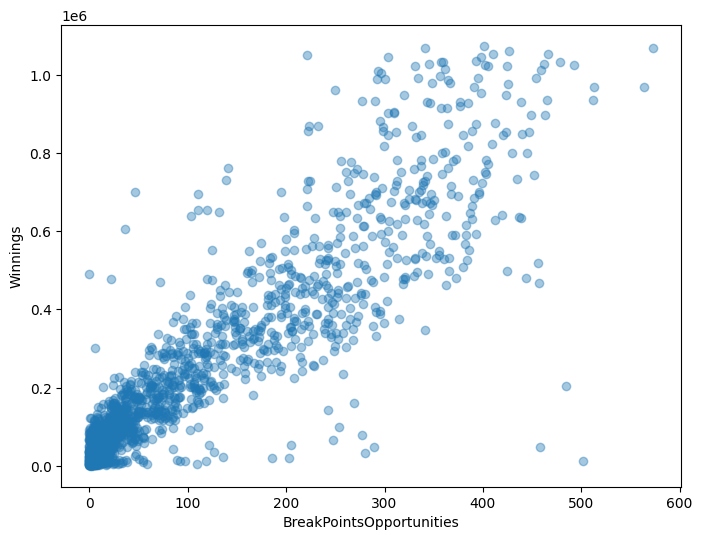

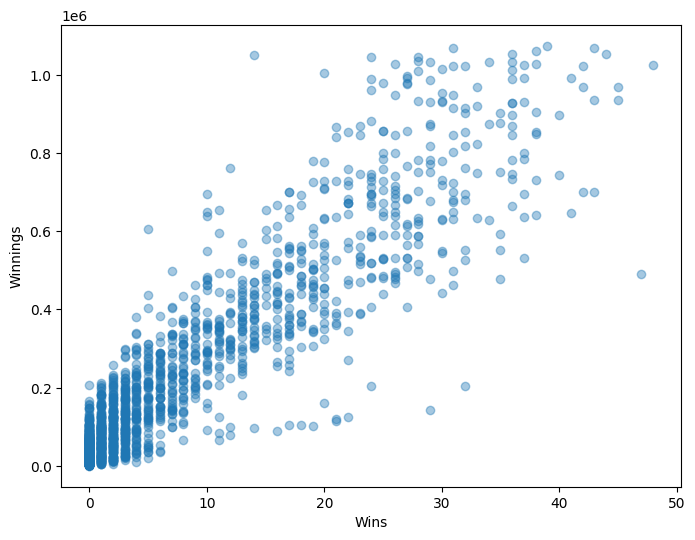

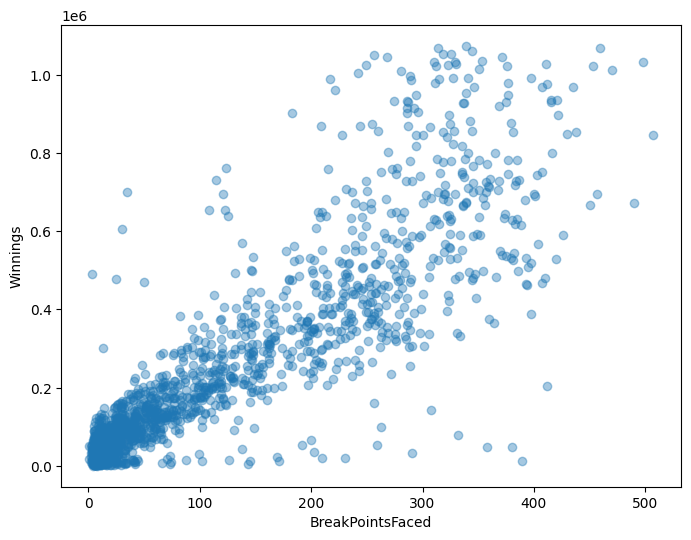

In [6]:
features = ["ServiceGamesPlayed", "ReturnGamesPlayed", "BreakPointsOpportunities", "Wins", "BreakPointsFaced"]

for feature in features:
    plt.figure(figsize=(8,6))
    plt.scatter(tennis[feature], tennis['Winnings'], alpha=0.4)
    plt.xlabel(feature)
    plt.ylabel('Winnings')
plt.show()

# One feature prediction

### How ServiceGamesPlayed affects the Wins

In [7]:
from sklearn.model_selection import train_test_split

feature = tennis[['ServiceGamesPlayed']]
outcome = tennis[['Wins']]

x_train, x_test, y_train, y_test = train_test_split(feature, outcome, test_size=0.2, random_state=42)

In [8]:
model = LinearRegression()
model.fit(x_train, y_train)

score = model.score(x_test, y_test)
score

0.8622935112738194

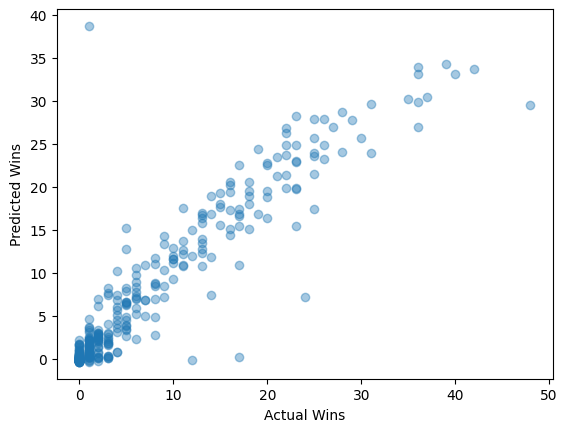

In [9]:
prediction = model.predict(x_test)
plt.scatter(y_test, prediction, alpha=0.4)
plt.xlabel('Actual Wins')
plt.ylabel('Predicted Wins')
plt.show()

# BreakPointsOpportunities vs Winnings

In [10]:
feature = tennis[['BreakPointsOpportunities']]
outcome = tennis[['Winnings']]

x_train, x_test, y_train, y_test = train_test_split(feature, outcome, test_size=0.2, random_state=42)

In [11]:
model = LinearRegression()
model.fit(x_train, y_train)

model.score(x_test, y_test)

0.7865551696389492

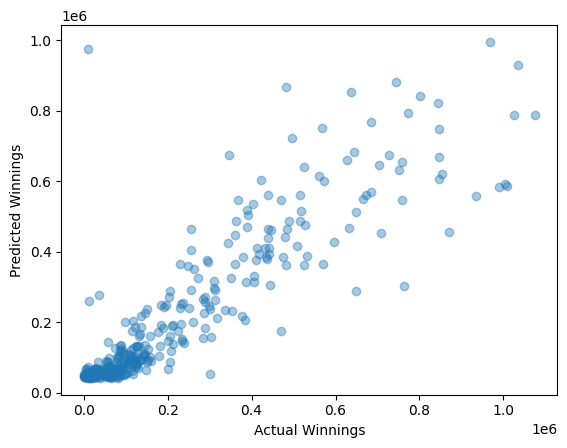

In [12]:
plt.scatter(y_test, model.predict(x_test), alpha=0.4)
plt.xlabel('Actual Winnings')
plt.ylabel('Predicted Winnings')
plt.show()

# Two features prediction

### BreakPointsFaced and ReturnGamesPlayed vs Winnings

In [13]:
feature = tennis[['BreakPointsFaced', 'ReturnGamesPlayed']]
outcome = tennis[['Winnings']]

x_train, x_test, y_train, y_test = train_test_split(feature, outcome, test_size=0.2, random_state=42)

In [14]:
model = LinearRegression()
model.fit(x_train, y_train)

model.score(x_test, y_test)

0.822898177374181

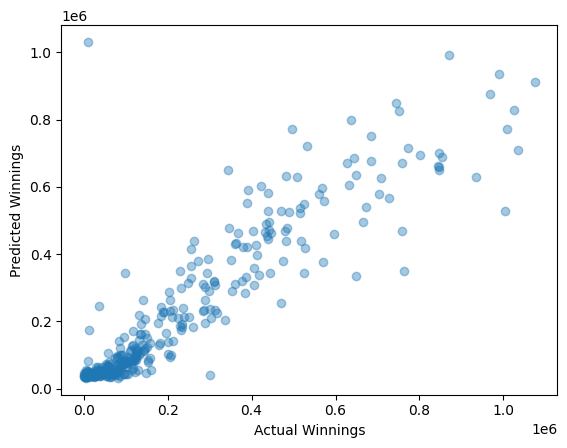

In [15]:
plt.scatter(y_test, model.predict(x_test), alpha=0.4)
plt.xlabel('Actual Winnings')
plt.ylabel('Predicted Winnings')
plt.show()

# TotalPointsWon and Aces vs Winnings

In [16]:
feature = tennis[['TotalPointsWon', 'Aces']]
outcome = tennis[['Winnings']]

x_train, x_test, y_train, y_test = train_test_split(feature, outcome, test_size=0.2, random_state=42)

In [17]:
model = LinearRegression()
model.fit(x_train, y_train)

model.score(x_test, y_test)

0.6223758949087943

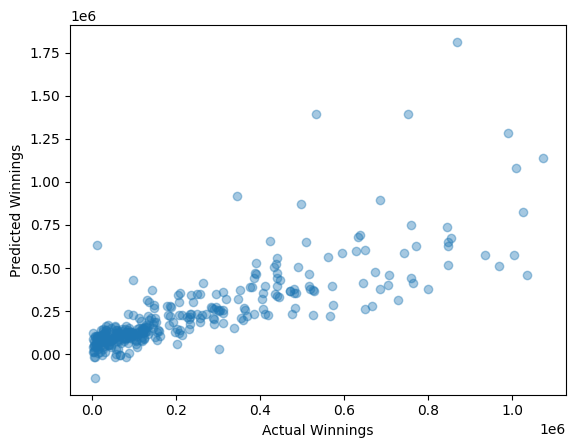

In [18]:
plt.scatter(y_test, model.predict(x_test), alpha=0.4)
plt.xlabel('Actual Winnings')
plt.ylabel('Predicted Winnings')
plt.show()

# Multiple features prediction

### All the columns in the dataset is used apart from Player, Year, Winnings and Losses

In [19]:
columns_to_drop = ['Player', 'Year', 'Winnings', 'Losses']

feature = tennis.drop(columns=columns_to_drop)
outcome = tennis[['Winnings']]

x_train, x_test, y_train, y_test = train_test_split(feature, outcome, test_size=0.2, random_state=42)

In [20]:
model = LinearRegression()
model.fit(x_train, y_train)

model.score(x_test, y_test)

0.8720382081056954

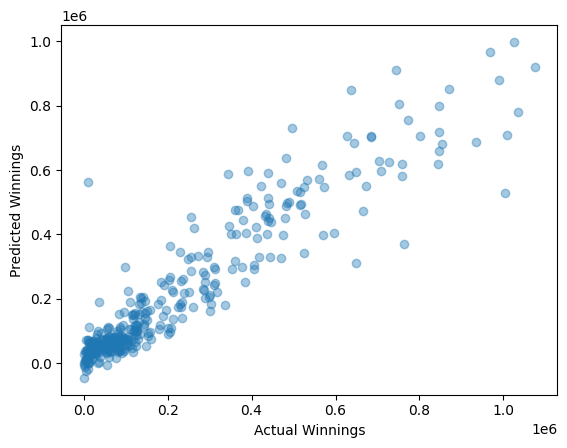

In [21]:
plt.scatter(y_test, model.predict(x_test), alpha=0.4)
plt.xlabel('Actual Winnings')
plt.ylabel('Predicted Winnings')
plt.show()